We now analyze the posterior disctribution obtained to estimate the parameters.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('posterior.csv')
df

,Unnamed: 0,mass_1,mass_2,dec,ra,time_jitter,phase,geocent_time,a_1,a_2,...,chi_2_in_plane,chi_p,cos_tilt_1,cos_tilt_2,redshift,comoving_distance,mass_1_source,mass_2_source,chirp_mass_source,total_mass_source
0,0,22.930230,42.161166,-1.207769,1.388252,0.000100,1.3,1.126260e+09,0.0,0.0,...,0.0,0.0,1.0,1.0,0.180058,762.674557,19.431447,35.728054,22.729226,55.159502
1,1,22.717989,42.326876,-1.241842,1.356685,0.000233,1.3,1.126260e+09,0.0,0.0,...,0.0,0.0,1.0,1.0,0.180058,762.674557,19.251591,35.868480,22.659264,55.120071
2,2,42.504665,22.507334,-1.217310,1.347798,0.000218,1.3,1.126260e+09,0.0,0.0,...,0.0,0.0,1.0,1.0,0.180058,762.674557,36.019140,19.073079,22.591987,55.092219
3,3,22.680901,42.297618,-1.227440,1.372446,0.000080,1.3,1.126260e+09,0.0,0.0,...,0.0,0.0,1.0,1.0,0.180058,762.674557,19.220163,35.843685,22.632291,55.063848
4,4,42.447202,22.266659,-1.177674,1.380596,-0.000071,1.3,1.126260e+09,0.0,0.0,...,0.0,0.0,1.0,1.0,0.180058,762.674557,35.970445,18.869127,22.449143,54.839573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,405,42.343869,22.424930,-1.211028,1.380293,-0.000173,1.3,1.126260e+09,0.0,0.0,...,0.0,0.0,1.0,1.0,0.180058,762.674557,35.882880,19.003248,22.507982,54.886128
406,406,42.328821,22.392133,-1.208369,1.382603,-0.000124,1.3,1.126260e+09,0.0,0.0,...,0.0,0.0,1.0,1.0,0.180058,762.674557,35.870127,18.975455,22.486753,54.845583
407,407,22.383333,42.334495,-1.211688,1.382318,-0.000171,1.3,1.126260e+09,0.0,0.0,...,0.0,0.0,1.0,1.0,0.180058,762.674557,18.967998,35.874936,22.483476,54.842934
408,408,22.282823,42.388429,-1.208195,1.381547,-0.000076,1.3,1.126260e+09,0.0,0.0,...,0.0,0.0,1.0,1.0,0.180058,762.674557,18.882825,35.920640,22.443212,54.803465


In [3]:
mass_1 = df['mass_1']
mass_2 = df['mass_2']
ra = df['ra']
dec = df['dec']
M = mass_1 + mass_2
mu = np.multiply(mass_1, mass_2)/M
eta = mu/M
Mc = M*eta**0.6
q = []
m1 = []    # smaller mass
m2 = []    # larger mass
i=0

for i in range(len(mass_1)):
    m_large = max(mass_1[i], mass_2[i])
    m_small = min(mass_1[i], mass_2[i])
    m1.append(m_small)
    m2.append(m_large)
    q.append(m_large/m_small)
    i = i + 1
    
lower_bound_m1 = np.quantile(m1, 0.05)
upper_bound_m1 = np.quantile(m1, 0.95)
median_m1 = np.quantile(m1, 0.5)
print("Smaller mass m1 = {} with a 90% C.I = {} -> {}".format(median_m1, lower_bound_m1, upper_bound_m1))

lower_bound_m2 = np.quantile(m2, 0.05)
upper_bound_m2 = np.quantile(m2, 0.95)
median_m2 = np.quantile(m2, 0.5)
print("Larger mass m2 = {} with a 90% C.I = {} -> {}".format(median_m2, lower_bound_m2, upper_bound_m2))
  
lower_bound_Mc = np.quantile(Mc, 0.05)
upper_bound_Mc = np.quantile(Mc, 0.95)
median_Mc = np.quantile(Mc, 0.5)
print("Chirp mass Mc = {} with a 90% C.I = {} -> {}".format(median_Mc, lower_bound_Mc, upper_bound_Mc))

lower_bound_q = np.quantile(q, 0.05)
upper_bound_q = np.quantile(q, 0.95)
median_q = np.quantile(q, 0.5)
print("Mass ratio q = {} with a 90% C.I = {} -> {}".format(median_q, lower_bound_q, upper_bound_q))

lower_bound_ra = np.quantile(ra, 0.05)
upper_bound_ra = np.quantile(ra, 0.95)
median_ra = np.quantile(ra, 0.5)
print("ra = {} with a 90% C.I = {} -> {}".format(median_ra, lower_bound_ra, upper_bound_ra))

lower_bound_dec = np.quantile(dec, 0.05)
upper_bound_dec = np.quantile(dec, 0.95)
median_dec = np.quantile(dec, 0.5)
print("dec = {} with a 90% C.I = {} -> {}".format(median_dec, lower_bound_dec, upper_bound_dec))

Smaller mass m1 = 22.330028277239357 with a 90% C.I = 22.12108060341823 -> 22.578019594335984
Larger mass m2 = 42.37604952110783 with a 90% C.I = 42.21394713649869 -> 42.51654763132683
Chirp mass Mc = 26.5128246879084 with a 90% C.I = 26.393592932177825 -> 26.640677547307785
Mass ratio q = 1.8974413691595777 with a 90% C.I = 1.869749787306263 -> 1.9203366751623514
ra = 1.380958180799517 with a 90% C.I = 1.358667519777208 -> 1.4019409173768127
dec = -1.209581880147781 with a 90% C.I = -1.2312796884068924 -> -1.1865086103771856


For better understanding, we can now plot histograms of estimated parameters, adding a region to indicate the 90% C.I.

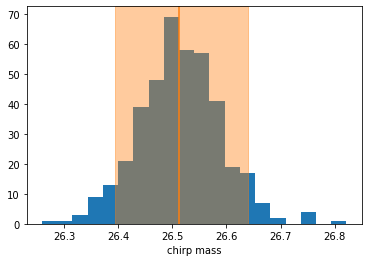

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.hist(Mc, bins=20)
ax.axvspan(lower_bound_Mc, upper_bound_Mc, color='C1', alpha=0.4)
ax.axvline(median_Mc, color='C1')
ax.set_xlabel("chirp mass")
plt.show()

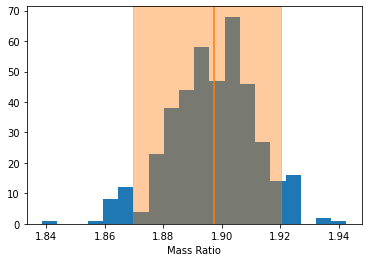

In [7]:
fig, ax = plt.subplots()
ax.hist(q, bins=20)
ax.axvspan(lower_bound_q, upper_bound_q, color='C1', alpha=0.4)
ax.axvline(median_q, color='C1')
ax.set_xlabel("Mass Ratio")
plt.show()

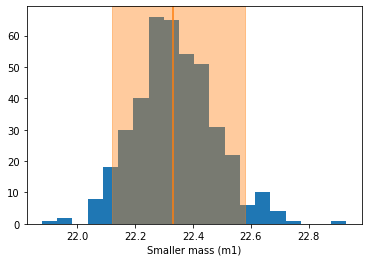

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.hist(m1, bins=20)
ax.axvspan(lower_bound_m1, upper_bound_m1, color='C1', alpha=0.4)
ax.axvline(median_m1, color='C1')
ax.set_xlabel("Smaller mass (m1)")
plt.show()

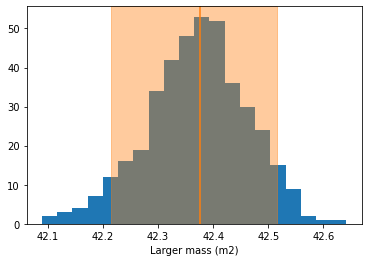

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.hist(m2, bins=20)
ax.axvspan(lower_bound_m2, upper_bound_m2, color='C1', alpha=0.4)
ax.axvline(median_m2, color='C1')
ax.set_xlabel("Larger mass (m2)")
plt.show()

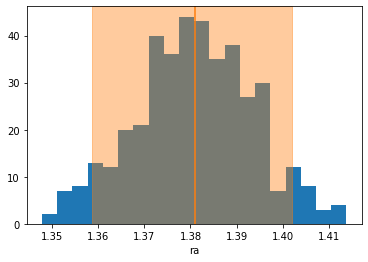

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.hist(ra, bins=20)
ax.axvspan(lower_bound_ra, upper_bound_ra, color='C1', alpha=0.4)
ax.axvline(median_ra, color='C1')
ax.set_xlabel("ra")
plt.show()

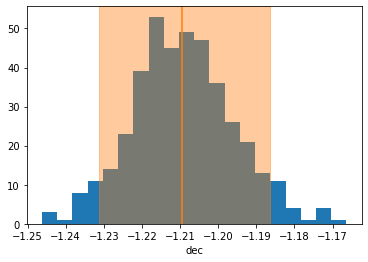

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.hist(dec, bins=20)
ax.axvspan(lower_bound_dec, upper_bound_dec, color='C1', alpha=0.4)
ax.axvline(median_dec, color='C1')
ax.set_xlabel("dec")
plt.show()

We now make corner plots of the paramters estimated.

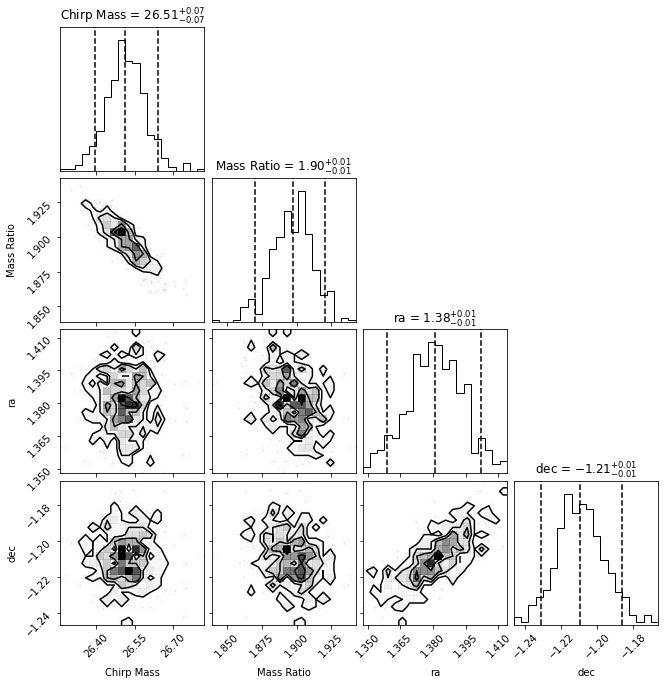

In [10]:
import corner

samples = []
i = 0
for i in range(len(mass_1)):
    sample = np.array([Mc[i], q[i], ra[i], dec[i]])
    samples.append(sample)
samples = np.array(samples)

figure = corner.corner(
    samples,
    labels=[
        r"Chirp Mass",
        r"Mass Ratio",
        r"ra",
        r"dec",
    ],
    quantiles=[0.05, 0.5, 0.95],
    show_titles=True,
    title_kwargs={"fontsize": 12},
)

Thus, our analysis is complete and we have successfully estimated the masses and sky location of the binary source.